In [2]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

In [3]:
m = 1.   # particle's mass
k = 1.   # drag coefficient
g = 9.81 # gravity acceleration

# the initial position is (0, 0)
v0 = np.zeros(4)

# the initial speed vector is oriented to the top right
v0[2] = 4.
v0[3] = 10.

# need to create a python function f that takes the current vector v(t0) and a time t0 as argument (with optional parameters), and that returns the derivative v'(t0)
def f(v, t0, k):
    # v has four components: v=[u, u']
    u, udot = v[:2], v[2:]
    
    # compute the second derivative u'' of u
    udotdot = -k/m * udot
    udotdot[1] -= g
    
    # we return v'=[u', u'']
    return np.r_[udot, udotdot]




In [4]:
np.linspace(0., 3., 30)

array([ 0.        ,  0.10344828,  0.20689655,  0.31034483,  0.4137931 ,
        0.51724138,  0.62068966,  0.72413793,  0.82758621,  0.93103448,
        1.03448276,  1.13793103,  1.24137931,  1.34482759,  1.44827586,
        1.55172414,  1.65517241,  1.75862069,  1.86206897,  1.96551724,
        2.06896552,  2.17241379,  2.27586207,  2.37931034,  2.48275862,
        2.5862069 ,  2.68965517,  2.79310345,  2.89655172,  3.        ])

(0, 6)

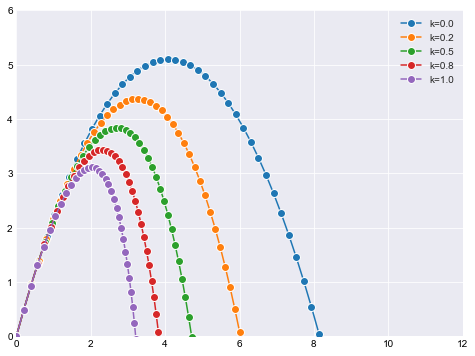

In [5]:
plt.figure(figsize=(8,6))

# evaluate the system on 30 linearly spaced times between t=0 and t=3
t = np.linspace(0., 3., 60)

# we simulate the system for different values of k
for k in np.linspace(0., 1., 5):
    # simulate the system for different values of k
    # given times
    v = spi.odeint(f, v0, t, args=(k,))
    
    # we plot the particle's trajectory
    plt.plot(v[:,0], v[:,1], 'o-', mew=1, ms=8, mec='w', label='k={0:.1f}'.format(k))
    
plt.legend()
plt.xlim(0, 12)
plt.ylim(0, 6)


In [6]:
# numpy.r function
# [numpy.r — NumPy v1.13 Manual](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.r_.html)

a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.array([7,8,9])
d = np.array([10,11,12])
# print(np.r_[a, 0, 0, b])

# print(np.r_[-1:1:6j, [0]*2, 8, 10])

# print(np.r_['-1', [a,b], [c,d]])
# print(np.r_['1', [a,b], [c,d]])
# print(np.r_['0',[a,b], [c,d]])
# print(np.r_['0,8',[a,b], [c,d]])
# print(np.r_['0,2,0', a, b])
# print(np.r_['1,2,0', a, b])




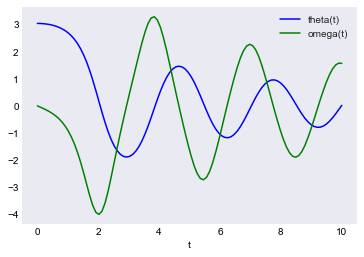

In [7]:
# [scipy.integrate.odeint — SciPy v1.0.0 Reference Guide](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint)

# theta''(t) + b*theta'(t) + c*sin(theta(t)) = 0
# theta'(t) = omega(t)
# omega'(t) = -b*omega(t) - c*sin(theta(t))

def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

b = 0.25
c = 5.0

y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 10, 100)

sol = spi.odeint(pend, y0, t, args=(b, c))

plt.plot(t, sol[:,0], 'b', label='theta(t)')
plt.plot(t, sol[:,1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [8]:
type(y0)
type(t)
t

array([  0.        ,   0.1010101 ,   0.2020202 ,   0.3030303 ,
         0.4040404 ,   0.50505051,   0.60606061,   0.70707071,
         0.80808081,   0.90909091,   1.01010101,   1.11111111,
         1.21212121,   1.31313131,   1.41414141,   1.51515152,
         1.61616162,   1.71717172,   1.81818182,   1.91919192,
         2.02020202,   2.12121212,   2.22222222,   2.32323232,
         2.42424242,   2.52525253,   2.62626263,   2.72727273,
         2.82828283,   2.92929293,   3.03030303,   3.13131313,
         3.23232323,   3.33333333,   3.43434343,   3.53535354,
         3.63636364,   3.73737374,   3.83838384,   3.93939394,
         4.04040404,   4.14141414,   4.24242424,   4.34343434,
         4.44444444,   4.54545455,   4.64646465,   4.74747475,
         4.84848485,   4.94949495,   5.05050505,   5.15151515,
         5.25252525,   5.35353535,   5.45454545,   5.55555556,
         5.65656566,   5.75757576,   5.85858586,   5.95959596,
         6.06060606,   6.16161616,   6.26262626,   6.36

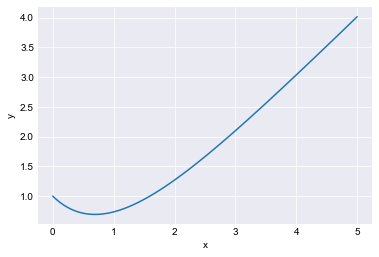

In [23]:
# [ODE_Example](http://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html)

def dy_dx(y, x):
    return x - y

xs = np.linspace(0, 5, 100)
y0 = 1.0 # the initial condition
ys = spi.odeint(dy_dx, y0, xs)
ys = ys.flatten()

# plotting
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xs, ys)

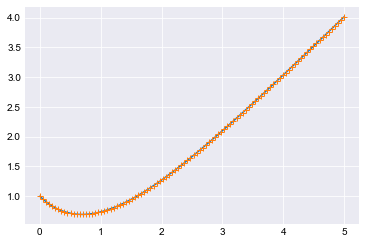

In [24]:
y_exact = xs - 1 + 2*np.exp(-xs)
y_difference = ys - y_exact
plt.plot(xs, ys, xs, y_exact, "+")

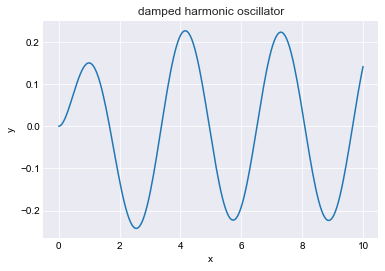

In [30]:
def dU_dx(U, x):
    # U is a vector such that y=U[0] and z=U[1] this function should return [y', z']
    dydt = [U[1], -2*U[1] - 2*U[0] + np.cos(2*x)]
    return dydt

U0 = [0, 0]
xs = np.linspace(0, 10, 200)
Us = spi.odeint(dU_dx, U0, xs)
ys = Us[:, 0]

plt.xlabel("x")
plt.ylabel("y")
plt.title("damped harmonic oscillator")
plt.plot(xs, ys)

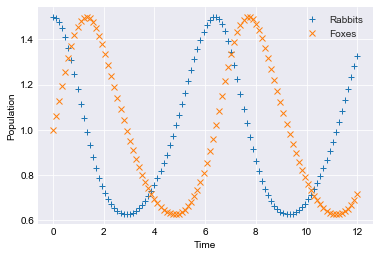

In [34]:
a, b, c, d = 1, 1, 1, 1

def dP_dt(P, t):
    dydt = [P[0] * (a - b*P[1]), -P[1]*(c-d*P[0])]
    return dydt

ts = np.linspace(0, 12, 100)
P0 = [1.5, 1.0]
Ps = spi.odeint(dP_dt, P0, ts)
prey = Ps[:,0]
predators = Ps[:,1]

plt.plot(ts, prey, "+", label = "Rabbits")
plt.plot(ts, predators, "x", label="Foxes")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()